<a href="https://colab.research.google.com/github/tswhy1/Aiffel_quest_cr/blob/main/Python/Deep%20Learning%20with%20Python/reuter_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels)=reuters.load_data(num_words=10000)

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [ ]:
train_data[0]

In [ ]:
word_index = reuters.get_word_index()
word_index

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

In [10]:
' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
train_labels[0]

3

In [12]:
train_labels.min()

0

In [13]:
train_labels.max()

45

In [14]:
#Y를 one-hot encoding

from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [17]:
one_hot_train_labels.shape

(8982, 46)

In [18]:
#x값의 변환
import numpy as np

def vectorize_seq(seq, dimension=10000):
  results = np.zeros((len(seq), dimension))
  for i, s in enumerate(seq):
    results[i, s] = 1.
  return results

In [25]:
x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [24]:
x_train.shape

(8982, 10000)

In [26]:
x_test.shape

(2246, 10000)

In [30]:
#model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
x_val = x_train[:1000] #검증데이터
p_x_train = x_train[1000:] #학습데이터

y_val = one_hot_train_labels[:1000] #검증데이터
p_y_train = one_hot_train_labels[1000:] #학습데이터

In [39]:
#학습

history = model.fit(p_x_train, p_y_train, epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.4121 - loss: 3.1987 - val_accuracy: 0.6130 - val_loss: 1.8590
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6515 - loss: 1.6736 - val_accuracy: 0.6780 - val_loss: 1.4054
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7244 - loss: 1.2368 - val_accuracy: 0.7340 - val_loss: 1.2081
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7812 - loss: 1.0029 - val_accuracy: 0.7530 - val_loss: 1.0872
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8166 - loss: 0.8246 - val_accuracy: 0.7960 - val_loss: 1.0007
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8541 - loss: 0.6785 - val_accuracy: 0.7870 - val_loss: 0.9830
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8725 - loss: 0.5963 - val_accuracy: 0.8000 - val_loss: 0.9329
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9024 - loss: 0.4913 - val_accuracy: 0.8050 - v

In [41]:
###시각화

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

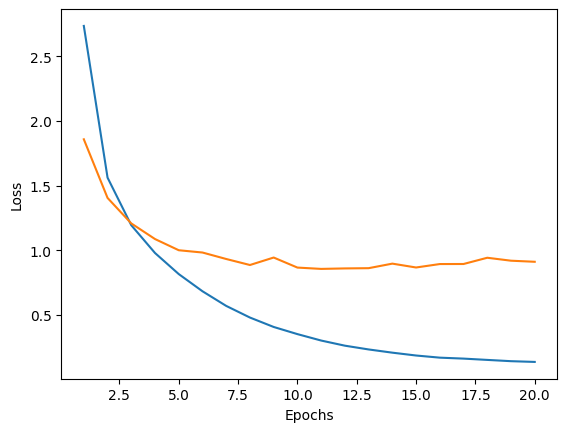

In [43]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [44]:
np.argmin(val_loss)

10

In [46]:
### epoch=11

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, one_hot_train_labels, epochs=11, batch_size=512)

Epoch 1/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3859 - loss: 3.1403
Epoch 2/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6680 - loss: 1.6070
Epoch 3/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.7324 - loss: 1.2247
Epoch 4/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7923 - loss: 0.9880
Epoch 5/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8320 - loss: 0.8136
Epoch 6/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8630 - loss: 0.6695
Epoch 7/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8821 - loss: 0.5576
Epoch 8/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9029 - loss: 0.4674
Epoch 9/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9177 - loss: 0.3883
Epoch 10/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9241 - loss: 0.3468
Epoch 11/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9401 - loss: 0.2854


In [47]:
model.evaluate(x_test, one_hot_test_labels)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.8905


[0.9081640243530273, 0.7987533211708069]

In [52]:
np.argmax(model.predict(x_test[:1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


3

In [53]:
test_labels[0]

3

In [55]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])